In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [112]:
historic_df = pd.read_csv(r'Base de Dados//Dados Históricos - Ibovespa.csv', parse_dates=['Data'], index_col='Data')

historic_df['Var%'] = historic_df['Var%'].str.replace('%', '').str.replace(',', '.').astype(float)

historic_df['Vol.'] = historic_df['Vol.'].str.replace(',', '.')
historic_df['Vol.'] = historic_df['Vol.'].apply(
    lambda x: float(str(x)[:-1].replace(',', '.'))/1_000  if str(x)[-1] == 'K'
    else float(str(x)[:-1].replace(',', '.')) if str(x)[-1] == 'M'
    else float(str(x)[:-1].replace(',', '.')) * 1_000 if str(x)[-1] == 'B'
    else float(str(x).replace(',', '.'))/1_000_000 )

historic_df.rename(columns={'Vol.':'Vol (M)'}, inplace=True)

C:\Users\dhlui\AppData\Local\Temp\ipykernel_12060\1969224291.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  historic_df = pd.read_csv(r'Base de Dados//Dados Históricos - Ibovespa.csv', parse_dates=['Data'], index_col='Data')


In [113]:
historic_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4975 entries, 2025-02-28 to 2005-02-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4975 non-null   float64
 1   Abertura  4975 non-null   float64
 2   Máxima    4975 non-null   float64
 3   Mínima    4975 non-null   float64
 4   Vol (M)   4974 non-null   float64
 5   Var%      4975 non-null   float64
dtypes: float64(6)
memory usage: 272.1 KB


In [114]:
historic_df.describe()

,Último,Abertura,Máxima,Mínima,Vol (M),Var%
count,4975.000000,4975.000000,4975.00000,4975.000000,4974.000000,4975.000000
mean,72.804747,72.785524,73.48200,72.096099,101.445068,0.046434
std,29.263901,29.263293,29.41898,29.110370,953.410290,1.664503
min,23.887000,23.883000,24.26000,23.680000,0.112100,-14.780000
25%,51.837000,51.833000,52.40950,51.251500,2.820000,-0.820000
50%,63.479000,63.477000,64.05500,62.826000,4.450000,0.060000
75%,100.598000,100.570500,101.56550,99.684500,10.920000,0.940000
max,137.344000,137.349000,137.46900,136.664000,24870.000000,14.660000


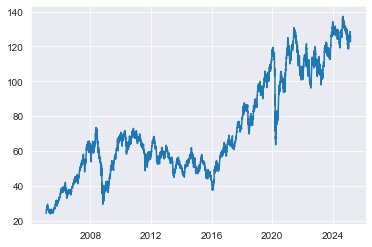

In [115]:
plt.plot(historic_df.index, historic_df['Último'])

In [128]:
historic_var_df = historic_df[['Último']]
X = historic_var_df[['Último']].values


In [129]:
# Teste utilizando valores brutos de fechamento
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -1.5095039192631983
P-Value: 0.5288047565595468
Valores críticos:
	1%: -3.431668292454838
	5%: -2.862122541756721
	10%: -2.567080087847736


Teste ADF
Teste Estatístico: -11.649130673580634
P-Value: 2.0575355469460137e-21
Valores críticos:
	1%: -3.431678469360345
	5%: -2.8621270378367885
	10%: -2.5670824812904223


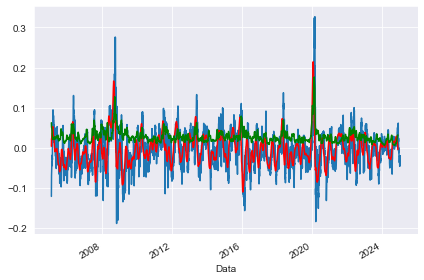

In [136]:
# Teste utilizando logaritimos dos últimos 30 dias

df_log = np.log(historic_var_df)
ma_log = df_log.rolling(30).mean()

df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(30).mean()

std = df_s.rolling(30).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


X_s = df_s['Último'].values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -17.501875853184202
P-Value: 4.381062677787713e-30
Valores críticos:
	1%: -3.4316809027362725
	5%: -2.8621281128816367
	10%: -2.5670830535800473


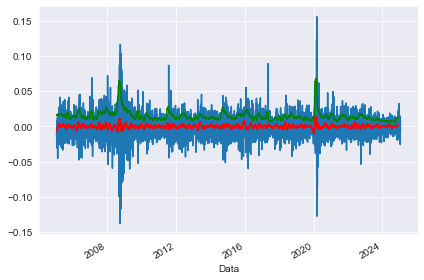

In [ ]:
# Teste utilizando desvio padrão
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(30).mean()

std_diff = df_diff.rolling(30).std()


f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_diff['Último'].dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [147]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_acf


array([ 1.00000000e+00, -5.44885468e-02, -1.01943616e-03, -3.87564698e-02,
       -2.41271728e-02,  1.23323545e-02, -5.23860767e-02,  1.23076669e-02,
        2.27965178e-03, -4.00494273e-04,  1.97395158e-02, -1.38835238e-02,
       -1.16038414e-02, -2.56722841e-02, -5.56243751e-03, -1.99776334e-02,
        2.32299206e-02,  5.08001752e-03, -3.96534842e-02, -3.50097323e-02,
        9.18318487e-03, -2.04156599e-02, -2.14779807e-02, -4.45751116e-02,
       -9.23275319e-03, -2.84017139e-02])

In [ ]:
lag_pacf = pacf(df_diff.dropna(), nlags=25)
lag_pacf